### Optimize the XY sequence with GA

In [1]:
from deap import base, creator, tools, algorithms
import numpy as np
import random
import RSC_sim
from datetime import datetime
from matplotlib import pyplot as plt

#### Cost funtion be the number of counts in radial n=0,1 states

### Original as reference, 25 $\mu K$

In [10]:
def cost_function(mol_list) -> int:
    """Your original success count: n_x<=1 and n_y<=1.
    Modify if you want z or harsher thresholds.
    """
    good = 0
    for mol in mol_list:
        if mol.n[0] <= 1 and mol.n[1] <= 1 and mol.state == 1 and mol.spin == 0 and not mol.islost:
            good += 1
    return good

In [11]:
XY = RSC_sim.load_sequence('sequence_XY.txt')
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_ = RSC_sim.apply_raman_sequence(mol_list, XY)
counts_x, counts_y, counts_z = RSC_sim.get_n_distribution(mol_list)
print(cost_function(mol_list))

Applying pulses to molecules:  21%|██▏       | 214/1000 [00:04<00:17, 45.34it/s] 


KeyboardInterrupt: 

#### Check the GA RSC function

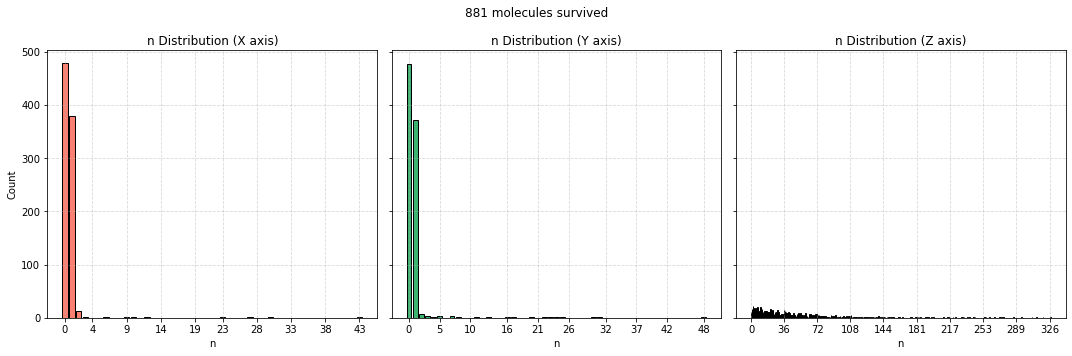

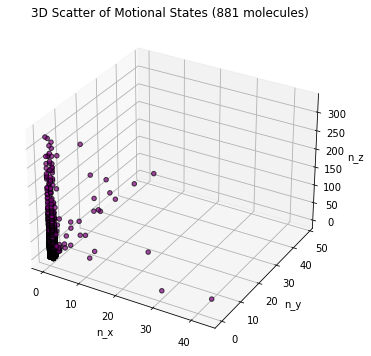

835


In [ ]:
XY = RSC_sim.load_sequence('sequence_XY.txt')
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
for mol in mol_list:
    RSC_sim.apply_raman_pulses_serial(mol, XY)
counts_x, counts_y, counts_z = RSC_sim.get_n_distribution(mol_list)
print(cost_function(mol_list))

### -5 < $\Delta n$ < -1, run 1

In [ ]:
file_dir = 'sequences/2025-09-25_16-40-17/'

Applying pulses to molecules: 100%|██████████| 1000/1000 [00:09<00:00, 101.40it/s]


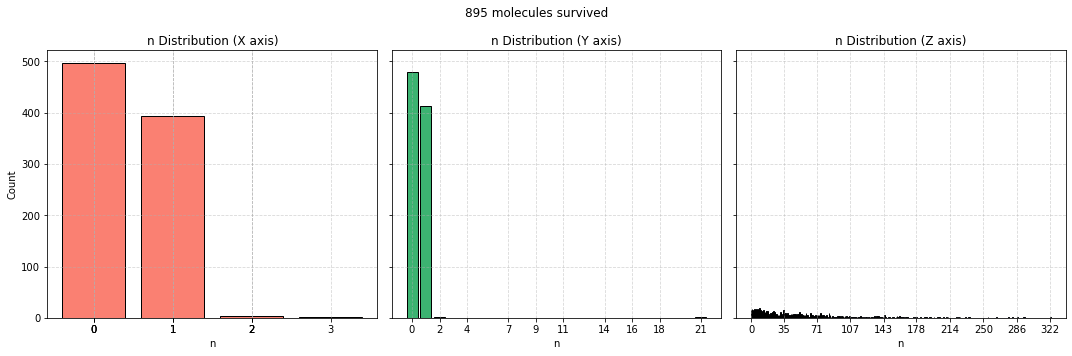

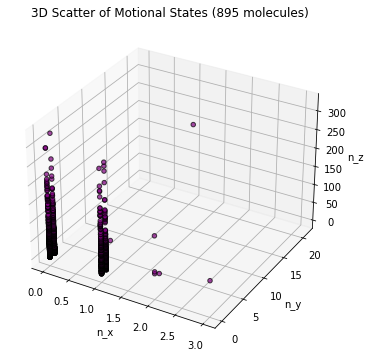

888


In [ ]:
seq = RSC_sim.load_sequence(file_dir+'best_sequence.txt')
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_ = RSC_sim.apply_raman_sequence(mol_list, seq)
counts_x, counts_y, counts_z = RSC_sim.get_n_distribution(mol_list)
print(cost_function(mol_list))

In [ ]:
print(len(seq))  # Length of the sequence

79


Text(0, 0.5, 'Cost')

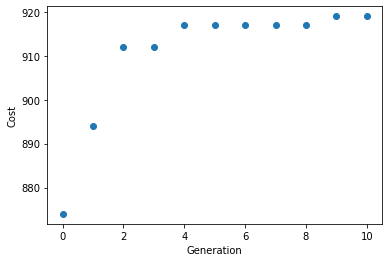

In [ ]:
history = np.loadtxt(file_dir+'history.txt')
plt.plot(history, 'o')
plt.xlabel('Generation')
plt.ylabel('Cost')

### 6 < $\Delta n$, add length penlty

Applying pulses to molecules: 100%|██████████| 1000/1000 [00:09<00:00, 100.45it/s]


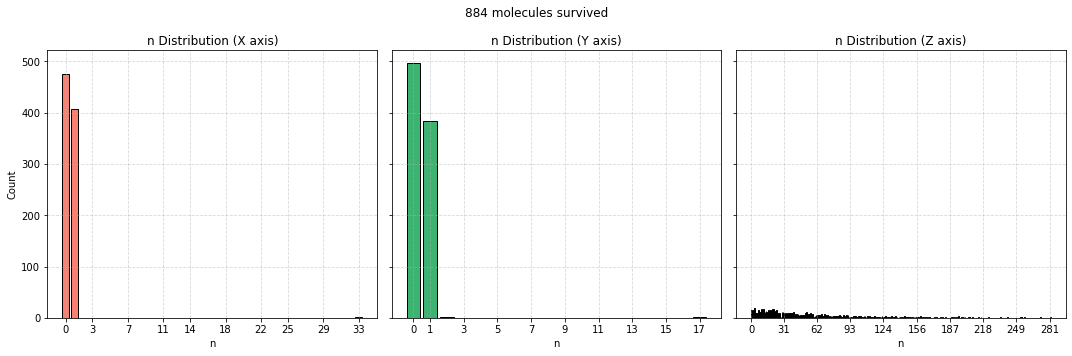

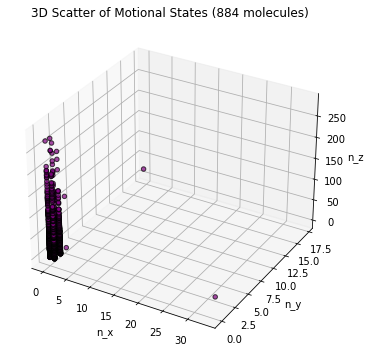

cost:  880
sequence length:  58


In [ ]:
file_dir = 'sequences/2025-09-25_17-08-19/'
seq = RSC_sim.load_sequence(file_dir+'best_sequence.txt')
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_ = RSC_sim.apply_raman_sequence(mol_list, seq)
counts_x, counts_y, counts_z = RSC_sim.get_n_distribution(mol_list)
print('cost: ', cost_function(mol_list))
print('sequence length: ', len(seq))

In [3]:
import XY_optimize

In [4]:
cfg = XY_optimize.GAConfig(
        mol_num=1000,
        temps=(25e-6, 25e-6, 25e-6),
        allowed_pulses=((0, -6), (0, -5), (0, -4), (0, -3), (0, -2), (1, -6), (1, -5), (1, -4), (1, -3), (1, -2)),
        ngen=3,
        mu=10, # population size
        lambda_=5, # number of selected parents after tournament
        cxpb=0.65,
        mutpb=0.35,
        tournament_k=3, # tournament size
        len_penalty=0.5,
        time_penalty=0.0,
        mutpb_decay=0.985,
        mut_indpb=0.12,
        patience=6,
        min_len=20,
        max_len=80,
        p_insert=0.20,
        p_delete=0.20,
        p_modify=0.60,
    )

In [5]:
XY_optimize.run_ga_master(cfg, 42)

Running generation  0


Evaluating jobs: 100%|██████████| 10000/10000 [01:23<00:00, 120.08mol/s]


Initial eval:  [827.  818.  550.  721.  831.5 787.  823.  719.  614.5 635. ]
Running generation  1


Evaluating jobs: 100%|██████████| 5000/5000 [00:46<00:00, 108.67mol/s]


Gen  1 :  [832.  831.5 827.  824.  823.  818.  787.  781.  721.  720. ]
Running generation  2


Evaluating jobs: 100%|██████████| 3000/3000 [00:23<00:00, 125.59mol/s]


Gen  2 :  [846.  840.  832.  832.  831.5 827.  824.  824.  823.  818. ]
Running generation  3


Evaluating jobs: 100%|██████████| 2000/2000 [00:18<00:00, 110.90mol/s]


Gen  3 :  [864.  846.  846.  840.  840.  840.  832.  832.  831.5 827. ]
Best length:  80
Best history:  [831.5, 832.0, 846.0, 864.0]
Done.
